In [19]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.models.NBC_sklearn import NBC_sklearn
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [20]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "wut"
dataset = "mk4"
methods = ["NBC_TI", "NBC", "NBC_sklearn", "sklearn_kmeans"]
k = 50

## Loading benchmark dataset

In [21]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]

## Fetching precomputed clustering results

In [22]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [23]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 10.4 s
Wall time: 10.9 s


## NBC-TI

In [24]:
%%time
model = NBC_TI(k)
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 8.28 s
Wall time: 8.83 s


## NBC using sklearn.neighbors

In [25]:
%%time
model = NBC_sklearn(k)
results["NBC_sklearn"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 15.6 ms
Wall time: 21.5 ms


## Comparison

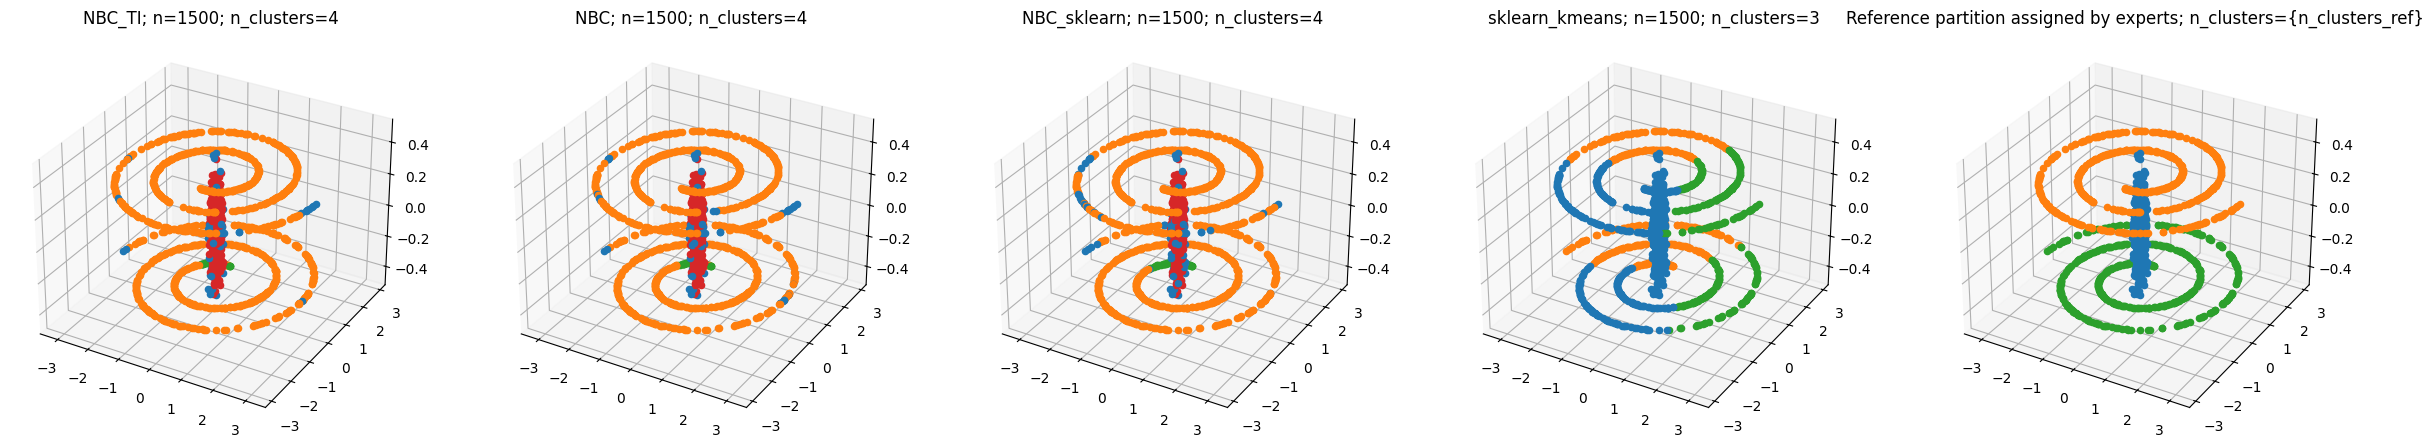

In [26]:
plot_results(benchmark.data, methods, results, reference)

In [27]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=None
╒═════════════════════╤═════════════════════╤═════════════════════╤═════════════════╕
│ NBC_TI              │ NBC                 │ NBC_sklearn         │ sklearn_kmeans  │
│ [[ 34   0   0 466]  │ [[ 37   0   0 463]  │ [[ 40   0   0 460]  │ [[500   0   0]  │
│  [ 17 483   0   0]  │  [ 21 479   0   0]  │  [ 27 473   0   0]  │  [193 143 164]  │
│  [  4 459  37   0]] │  [ 12 447  41   0]] │  [ 12 436  52   0]] │  [160 205 135]] │
╘═════════════════════╧═════════════════════╧═════════════════════╧═════════════════╛


In [28]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=None
╒═══════════════════════════╤═══════════════════════════╤══════════════════════════╤═══════════════════════════╕
│ NBC_TI                    │ NBC                       │ NBC_sklearn              │ sklearn_kmeans            │
│ ar: 0.5253074643708325    │ ar: 0.518312893391561     │ ar: 0.5121270072552875   │ ar: 0.20188802917512055   │
│ r: 0.7638416722259285     │ r: 0.7625448076495441     │ r: 0.7617869690905048    │ r: 0.623203913720258      │
│ fm: 0.7276225178962613    │ fm: 0.7192473518818165    │ fm: 0.711212346420119    │ fm: 0.5003567351536449    │
│ afm: 0.5422923017994845   │ afm: 0.5326266013666678   │ afm: 0.5239279670571855  │ afm: 0.20391127259994882  │
│ mi: 0.6323215276172084    │ mi: 0.6243868776572838    │ mi: 0.626517434833957    │ mi: 0.2565016871976522    │
│ nmi: 0.6430976465962079   │ nmi: 0.624191146994309    │ nmi: 0.6153766389005679  │ nmi: 0.24663165064000322  │
│ ami: 0.6423620353161523   │ ami: 0.6234310171922202   │ ami: 0.614613557523711